# DO NOT USE
I made this back when I thought I would be using squares to determine covid heat, not a random forest algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('latimes-place-totals.csv')

In [9]:
df.head()

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-10-25,Alameda,1.0,Alameda,456,NaN,-122.274444,37.756111
1,2020-10-25,Alameda,1.0,Albany,63,NaN,-122.297778,37.886944
2,2020-10-25,Alameda,1.0,Berkeley,749,NaN,-122.272778,37.871667
3,2020-10-25,Alameda,1.0,Dublin,320,NaN,-121.935833,37.702222
4,2020-10-25,Alameda,1.0,Emeryville,102,NaN,-122.285278,37.831389


In [12]:
df['place'].nunique()

1245

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167270 entries, 0 to 167269
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             167270 non-null  object 
 1   county           167270 non-null  object 
 2   fips             165673 non-null  float64
 3   place            167270 non-null  object 
 4   confirmed_cases  167270 non-null  int64  
 5   note             5176 non-null    object 
 6   x                164796 non-null  float64
 7   y                164796 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.2+ MB


In [36]:
df.place.unique()

array(['Alameda', 'Albany', 'Berkeley', ..., 'Pico', 'San Ysidro',
       'Santa Clarita and Stevenson Ranch'], dtype=object)

In [34]:
#df_test = df.groupby(by = 'place')
df_test = pd.DataFrame({'count' : df.groupby( ['place', 'date'] ).size()}).reset_index()

In [35]:
df_test.head()

,place,date,count
0,90755: Long Beach,2020-08-17,1
1,90802: Long Beach,2020-04-29,1
2,90802: Long Beach,2020-04-30,1
3,90802: Long Beach,2020-05-01,1
4,90802: Long Beach,2020-05-02,1


In [ ]:
df_most_recent = df.loc[df['date'] == '2020-10-25']
df_before_most_recent = 

In [20]:
df_recent = df.groupby(by = 'date')
df_recent = df.loc[df['date'] == '2020-10-25']
df.loc[df['a'] > 10, ['a','c']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             683 non-null    object 
 1   county           683 non-null    object 
 2   fips             672 non-null    float64
 3   place            683 non-null    object 
 4   confirmed_cases  683 non-null    int64  
 5   note             1 non-null      object 
 6   x                677 non-null    float64
 7   y                677 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 48.0+ KB


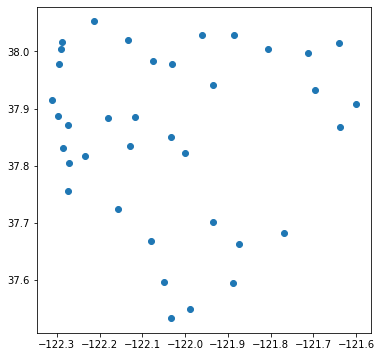

In [49]:
df_x_y = df[['x', 'y']][:40]
plt.figure(figsize=(6, 6));
plt.scatter(df_x_y['x'], df_x_y['y'])

Dataframe 1 columns: Covid info
- Index: (Lat1, Lon1, Lat2, Lon2)
- Latitude 1 column
- Longitude 1 column
- Latitude 2 column
- Longitude 2 column
- number of cases in that area
    - if there's a dot, count that
    - if there isn't a dot, leave blank (NaN)
- Covid 'heat'
    - if the number of cases column is NOT blank, rate on scale from 1-10
    - if the number of cases column is blank, take average of the 8 around it
        - TARGET BLANK BOX: (Lat1, Lon1, Lat1 - .1, Lon1 + .1)
        - top left (Lat1 + .1, Lon1 - .1, Lat1, Lon1)
        - middle left (Lat1, Lon1 - .1, Lat1 - .1, Lon1)
        - bottom left (Lat1 - .1, Lon1 - .1, Lat1 - .2, Lon1)
        - bottom middle 
        - bottom right
        - middle right
        - top right
        - top middle
*
PLOT AND SEE WHAT HAPPENS
*


Dataframe 2 columns: GS info
- index: GS number (coordinates?)
- coordinates (CANNOT BE INDEX)
- Gas station (GS) names
- GS latitude
- GS Longitude
- heat for this GS based on region
    - From DF1, for DF1 index = DF2 coordinates, get DF1 heat column value
*
PLOT: scatter plot of all gas stations (x = longitude, y = latitude, hue = heat), compare with above
*


Dataframe 3: Error analysis
- LOCATION INPUT: current coordinates, desired coordinates
- RUSH INPUT: Are you in a rush?
- 
- Only look at DF2 columns that are within this region
- Find y = mx+b Line for these inputs


Columns:
- Index: GS number (from DF2)
- Heat (from DF2)
- Distance from point to Line (total Least squares)
- Error metric:
    - Weight the heat and distance columns:
        - Do some sort of data science-y thing that determines the optimal weights
        - Questions for weight optimization: 
            - How concerned are you about covid?
                - Not concerned
                - Mildly concerned
                - Very concerned
            - Are you in a rush?
                - Yes!! I am rushing asap!!!
                - Yes
                - No
        - Default to "very concerned" unless they are in a big rush (puts a higher weight on the heat of the gas station)
        - If in a big rush, put higher weight (slightly) on the distance RMSE
    - Overall goal: find the gas station which is the minimum of this error metric
    
    
# DO KNN FOR GAS STATION CLASSIFICATION!!!


In [78]:
# Python program to find the distance between 
# a given point and a given line in 2 D. 

# from https://www.geeksforgeeks.org/perpendicular-distance-between-a-point-and-a-line-in-2-d/
  
import math 
  
# Function to find distance given ax + by + c = 0
# if we have the equation y = 
def shortest_distance(x, y, a, b, c):
    d = abs((a * x + b * y + c)) / (math.sqrt(a * a + b * b)) 
    return d


def get_a_b_c(x1, y1, x2, y2):
    a = -(y2 - y1)
    b = (x2 - x1)
    c = (a * x1) + (b * y1)
    return a, b, c

a = get_a_b_c(2, -1, 3, -3)[0]
b = get_a_b_c(2, -1, 3, -3)[1]
c = get_a_b_c(2, -1, 3, -3)[2]

x = 6
y = 8
shortest_distance(x, y, a, b, c)

10.285912696499032

Text(0.5, 1.0, 'Example')

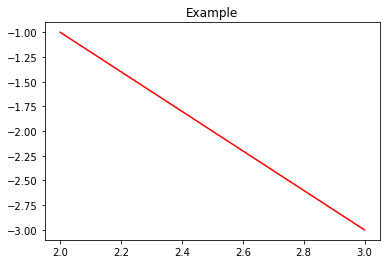

In [139]:
## Visualize what's above

x1 = 2
y1 = -1
x2 = 3
y2 = -3

def line_eq(x1, y1, x2, y2):
    slope = (y1 - y2) / (x1 - x2)
    b = y1 - (slope * x1)
    return (slope, b)
    
    
x_graph = np.linspace(x1, x2)
y_graph = (line_eq(x1, y1, x2, y2)[0] * x_graph) + line_eq(x1, y1, x2, y2)[1]

plt.plot(x_graph, y_graph, '-r')
plt.title('Example')

In [96]:
from sympy.solvers import solve, linsolve
from sympy import symbols

In [143]:
# for red line above:
x1 = 2
y1 = -1
x2 = 3
y2 = -3
slope = line_eq(x1, y1, x2, y2)[0] 
b = line_eq(x1, y1, x2, y2)[1]

#given a point with coordinates (x_a, y_a), find equation of perpendicular line
x_a = 2.2
y_a = 2.5
# the slope will be the negative inverse of the line it's perpendicular to
slope_a = -1/slope
# find b by plugging in the coordinates of our point
b_a = y_a - (slope_a * x_a)

print('slope: ', slope)
print('b: ', b)
print('slope_a: ', slope_a)
print('b_a: ', b_a)


slope:  -2.0
b:  3.0
slope_a:  0.5
b_a:  1.4


In [157]:
# Brute force to find point of intersection (poi) between these lines
x_poi = (b_a - b) / (slope - slope_a)
y_poi = (slope * x_poi) + b
print((x_poi, y_poi))

(0.64, 1.72)


In [161]:
print((x1, x2))
print((x_poi, x_a))

(2, 3)
(0.64, 2.2)


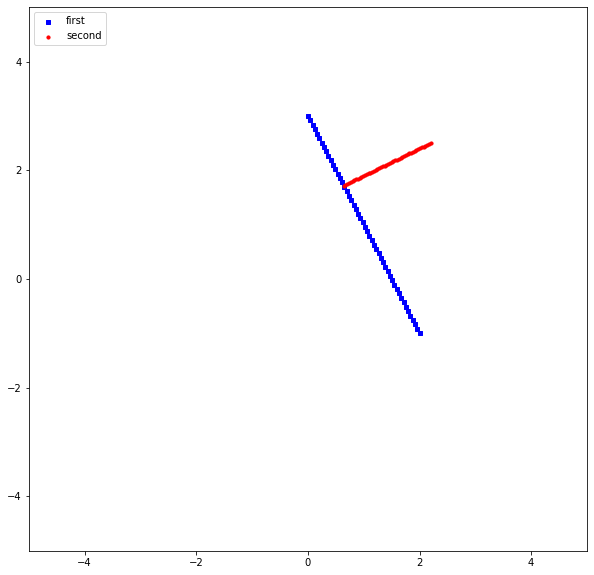

In [173]:
x_z = np.linspace(0, 2)
y_z = (slope * x_z) + b


x_z2 = np.linspace(x_poi, x_a)
y_z2 = (slope_a * x_z2) + b_a


fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)

ax1.scatter(x_z, y_z, s=10, c='b', marker="s", label='first')
ax1.scatter(x_z2, y_z2, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

Text(0.5, 1.0, 'Example')

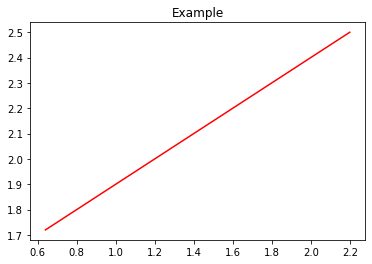

In [149]:
x_graph = np.linspace(x_a, x_poi)
y_graph = (slope_a * x_graph) + b_a

plt.plot(x_graph, y_graph, '-r')
plt.title('Example')

Text(0.5, 1.0, 'Example')

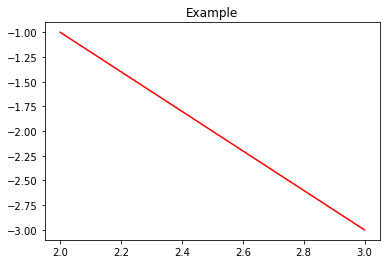

In [145]:
x_graph_2 = np.linspace(x1, x2)
y_graph_2 = (line_eq(x_a, y_a, x_b, y_b)[0] * x_graph_2) + line_eq(x_a, y_a, x_b, y_b)[1]
plt.plot(x_graph, y_graph, '-r')
plt.title('Example')

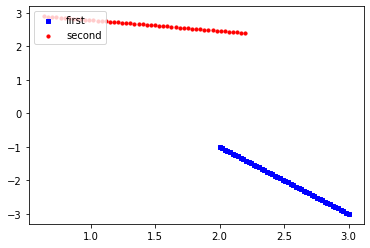

In [150]:
x_graph = np.linspace(x1, x2)
y_graph = (line_eq(x1, y1, x2, y2)[0] * x_graph) + line_eq(x1, y1, x2, y2)[1]

x_graph_2 = np.linspace(x_a, x_poi)
y_graph_2 = (slope_a * x_graph) + b_a

#x_graph_2 = np.linspace(x1, x2)
#y_graph_2 = (line_eq(x_a, y_a, x_b, y_b)[0] * x_graph_2) + line_eq(x_a, y_a, x_b, y_b)[1]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_graph, y_graph, s=10, c='b', marker="s", label='first')
ax1.scatter(x_graph_2, y_graph_2, s=10, c='r', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()

In [75]:
line_eq(x1, y1, x2, y2)[0]

-2.0

In [70]:
df.head()

,date,county,fips,place,confirmed_cases,note,x,y
0,2020-10-25,Alameda,1.0,Alameda,456,NaN,-122.274444,37.756111
1,2020-10-25,Alameda,1.0,Albany,63,NaN,-122.297778,37.886944
2,2020-10-25,Alameda,1.0,Berkeley,749,NaN,-122.272778,37.871667
3,2020-10-25,Alameda,1.0,Dublin,320,NaN,-121.935833,37.702222
4,2020-10-25,Alameda,1.0,Emeryville,102,NaN,-122.285278,37.831389


In [ ]:
#find the point at which these two equations intersect: use sympy

x, y, z = symbols('x, y, z')
#linsolve([slope*x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))
coords = linsolve([y - (slope*x + b), y - (slope_a*x + b_a)], (x, y))

x_b = float(coords.args[0][0])
y_b = float(coords.args[0][1])

print(x_b, y_b)